In this work, I am using a survey that would ask customers to rate various aspects of their experience, such as comfort of seats, delay handling, friendliness of flight attendants, overall customer satisfaction, and etc.
I want to know the key drivers of overall customer satisfaction to suggest airline how they can improve customer satisfaction.

In [ ]:
# install.packages("ggplot2")
# install.packages("ggcorrplot")

In [ ]:
library(ggplot2)
library(ggcorrplot)

In [ ]:
# Reading the data set.
airline = read.csv("survey_data.csv")
# Looking at data.
str(airline)
# Checking for missing values.
summary(airline)

'data.frame':	999 obs. of  9 variables:
 $ seat_comfort                  : int  3 2 1 5 3 4 5 5 2 5 ...
 $ seat_cleanliness              : int  3 5 5 5 2 1 4 1 2 5 ...
 $ flight_attendant_courtesy     : int  3 1 1 4 3 2 4 5 1 5 ...
 $ flight_attendant_attentiveness: int  3 4 3 5 4 1 4 3 3 3 ...
 $ food_quality                  : int  3 2 5 4 3 2 1 3 2 1 ...
 $ was_flight_delayed            : chr  "YES" "YES" "YES" "YES" ...
 $ delay_minutes                 : int  12 102 117 53 20 40 11 120 49 68 ...
 $ delay_handling                : int  4 4 4 4 5 4 2 4 5 5 ...
 $ overall_customer_satisfaction : int  6 9 8 8 6 8 6 9 8 9 ...


  seat_comfort   seat_cleanliness flight_attendant_courtesy
 Min.   :1.000   Min.   :1.000    Min.   :1.000            
 1st Qu.:2.000   1st Qu.:2.000    1st Qu.:2.000            
 Median :3.000   Median :3.000    Median :3.000            
 Mean   :2.995   Mean   :3.046    Mean   :3.039            
 3rd Qu.:4.000   3rd Qu.:4.000    3rd Qu.:4.000            
 Max.   :5.000   Max.   :5.000    Max.   :5.000            
                                                           
 flight_attendant_attentiveness  food_quality   was_flight_delayed
 Min.   :1.000                  Min.   :1.000   Length:999        
 1st Qu.:2.000                  1st Qu.:2.000   Class :character  
 Median :3.000                  Median :3.000   Mode  :character  
 Mean   :2.996                  Mean   :3.091                     
 3rd Qu.:4.000                  3rd Qu.:4.000                     
 Max.   :5.000                  Max.   :5.000                     
                                                   

We can see values of 'delay minutes' and 'delay handling' columns are "NA" for ontime flights. Thus, I seperate this dataset into two 'ontime' and 'delayed' datasets for further exploring.

In [ ]:
dataset1 = airline[!is.na(airline$delay_minutes), ]
dataset2 = airline[is.na(airline$delay_minutes), ]
data_delay = dataset1[, - which(colnames(dataset1) == "was_flight_delayed")]
data_ontime = dataset2[, colSums(is.na(dataset2)) == 0]
data_ontime = data_ontime[, - which(colnames(data_ontime) == "was_flight_delayed")]

In [ ]:
str(data_delay)

'data.frame':	695 obs. of  8 variables:
 $ seat_comfort                  : int  3 2 1 5 3 4 5 5 2 5 ...
 $ seat_cleanliness              : int  3 5 5 5 2 1 4 1 2 5 ...
 $ flight_attendant_courtesy     : int  3 1 1 4 3 2 4 5 1 5 ...
 $ flight_attendant_attentiveness: int  3 4 3 5 4 1 4 3 3 3 ...
 $ food_quality                  : int  3 2 5 4 3 2 1 3 2 1 ...
 $ delay_minutes                 : int  12 102 117 53 20 40 11 120 49 68 ...
 $ delay_handling                : int  4 4 4 4 5 4 2 4 5 5 ...
 $ overall_customer_satisfaction : int  6 9 8 8 6 8 6 9 8 9 ...


In [ ]:
str(data_ontime)

'data.frame':	304 obs. of  6 variables:
 $ seat_comfort                  : int  4 5 2 4 5 4 3 4 4 2 ...
 $ seat_cleanliness              : int  1 1 2 4 3 5 3 1 5 4 ...
 $ flight_attendant_courtesy     : int  1 2 1 2 5 4 5 4 3 3 ...
 $ flight_attendant_attentiveness: int  4 4 3 5 3 5 3 1 5 3 ...
 $ food_quality                  : int  3 2 3 3 1 4 2 5 4 3 ...
 $ overall_customer_satisfaction : int  4 6 2 6 8 8 6 8 6 4 ...


Correlogram for delayed flights to see which coefficients are statistically significant.

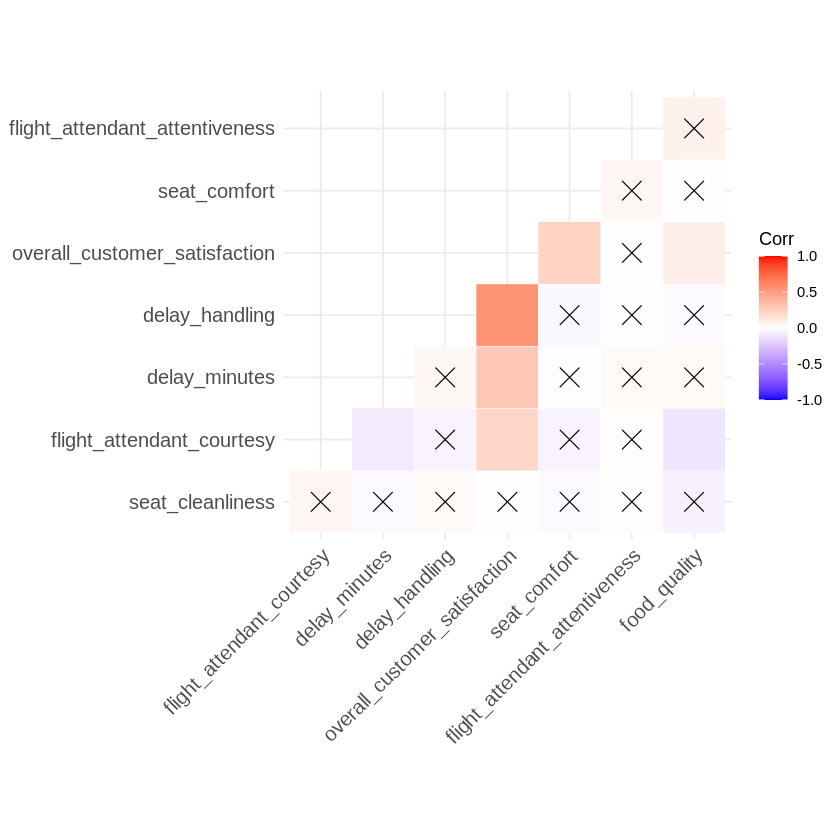

In [ ]:
corr <- round(cor(data_delay), 2)
p.mat <- cor_pmat(data_delay)
ggcorrplot(corr, hc.order = TRUE,
    type = "lower", outline.col = "white", p.mat = p.mat)

I use backward elimination method to find drivers.

In [ ]:
modelFit1 <- lm(overall_customer_satisfaction ~ ., data = data_delay)
summary(modelFit1)


Call:
lm(formula = overall_customer_satisfaction ~ ., data = data_delay)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2798 -1.0723 -0.0346  1.0028  4.2250 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -1.286810   0.368807  -3.489 0.000516 ***
seat_comfort                    0.421375   0.041959  10.043  < 2e-16 ***
seat_cleanliness               -0.036866   0.041902  -0.880 0.379273    
flight_attendant_courtesy       0.463765   0.042583  10.891  < 2e-16 ***
flight_attendant_attentiveness -0.046500   0.040440  -1.150 0.250607    
food_quality                    0.206076   0.041942   4.913 1.12e-06 ***
delay_minutes                   0.018282   0.001676  10.909  < 2e-16 ***
delay_handling                  1.141152   0.053019  21.523  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.537 on 687 degrees of freedom
Multiple R-squared:  0.5296,	Adjust

In [ ]:
modelFit2 <- update(modelFit1, .~.-seat_cleanliness)
summary(modelFit2)


Call:
lm(formula = overall_customer_satisfaction ~ seat_comfort + flight_attendant_courtesy + 
    flight_attendant_attentiveness + food_quality + delay_minutes + 
    delay_handling, data = data_delay)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2734 -1.0802 -0.0471  1.0229  4.3060 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -1.398286   0.346301  -4.038 6.00e-05 ***
seat_comfort                    0.422139   0.041943  10.065  < 2e-16 ***
flight_attendant_courtesy       0.462192   0.042539  10.865  < 2e-16 ***
flight_attendant_attentiveness -0.047208   0.040426  -1.168    0.243    
food_quality                    0.208114   0.041872   4.970 8.45e-07 ***
delay_minutes                   0.018304   0.001676  10.924  < 2e-16 ***
delay_handling                  1.139711   0.052985  21.510  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.537 on 6

In [ ]:
modelFit3 <- update(modelFit2, .~.-flight_attendant_attentiveness)
summary(modelFit3)


Call:
lm(formula = overall_customer_satisfaction ~ seat_comfort + flight_attendant_courtesy + 
    food_quality + delay_minutes + delay_handling, data = data_delay)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3321 -1.0832 -0.0492  1.0474  4.2126 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -1.518853   0.330640  -4.594 5.18e-06 ***
seat_comfort               0.419993   0.041914  10.020  < 2e-16 ***
flight_attendant_courtesy  0.461226   0.042542  10.842  < 2e-16 ***
food_quality               0.204761   0.041784   4.900 1.19e-06 ***
delay_minutes              0.018249   0.001675  10.893  < 2e-16 ***
delay_handling             1.140443   0.052996  21.520  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.537 on 689 degrees of freedom
Multiple R-squared:  0.5281,	Adjusted R-squared:  0.5247 
F-statistic: 154.2 on 5 and 689 DF,  p-value: < 2.2e-16


I Use F test to compare three model and make sure modelFit3 is the best model.

In [ ]:
anova(modelFit3, modelFit2, modelFit1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,689,1627.717,NA,NA,NA,NA
2,688,1624.497,1,3.220016,1.3632791,0.2433751
3,687,1622.669,1,1.828293,0.7740562,0.3792728


In the above ANOVA table, we can see that p-value is much higher than 0.05 and we can say there is no statistically significant evidence to reject the null hypothesis. Thus, we accept that the coefficients of "flight_attendant_attentiveness" and "seat_cleanliness" are zero.

We can check the residual graph to see they have a normal distribution with zero mean and a fixed variance.

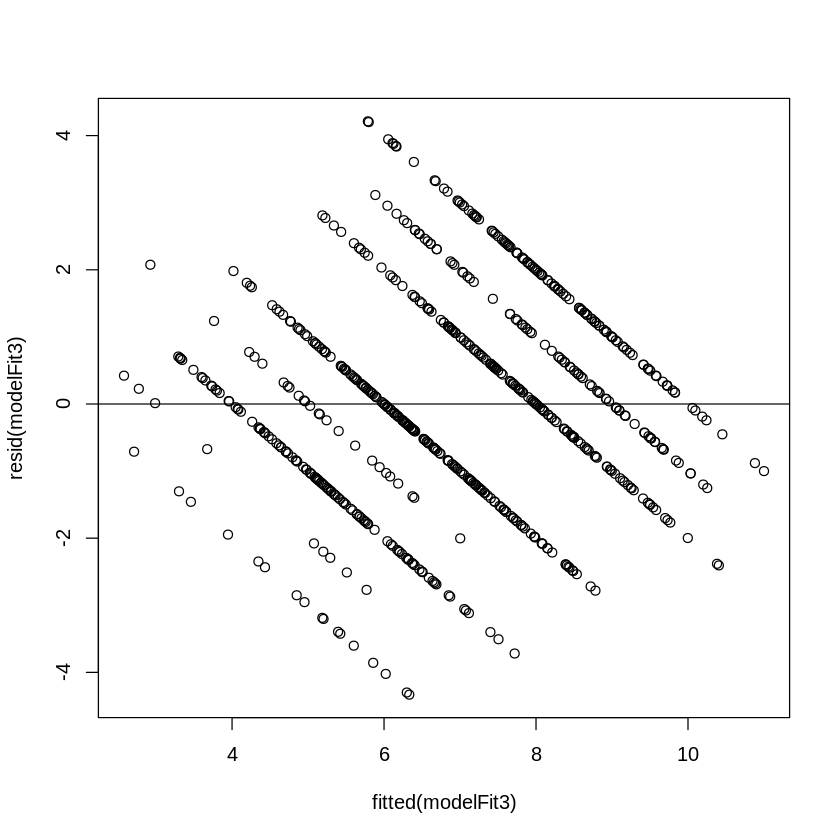

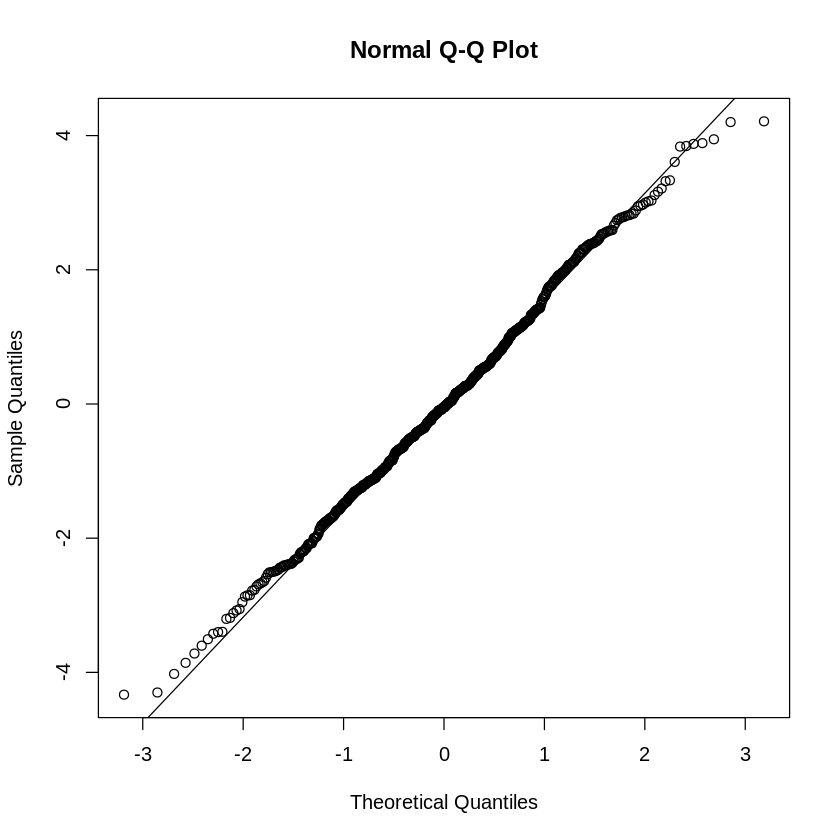

In [ ]:
plot(fitted(modelFit3), resid(modelFit3))
abline(h = 0)
qqnorm(resid(modelFit3))
qqline(resid(modelFit3))

Correlogram for ontime flights to see which coefficients are statistically significant.

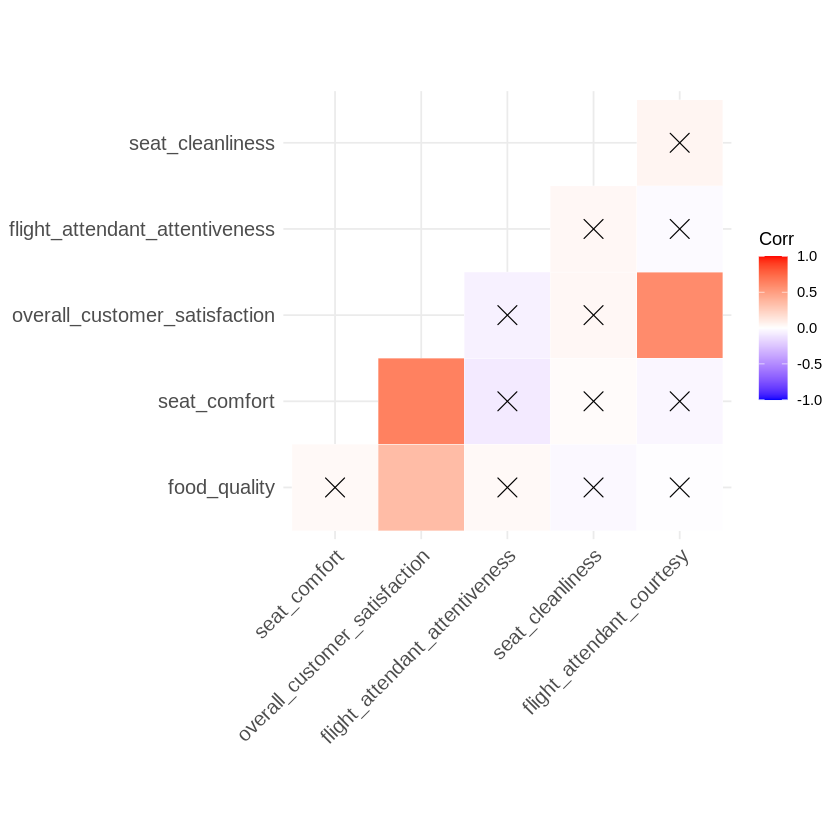

In [ ]:
corr <- round(cor(data_ontime), 2)
p.mat <- cor_pmat(data_ontime)
ggcorrplot(corr, hc.order = TRUE,
    type = "lower", outline.col = "white", p.mat = p.mat)

Using backward elimination method for finding drivers of overall satisfaction for ontime flights.

In [ ]:
modelFit11 <- lm(overall_customer_satisfaction ~ ., data = data_ontime)
summary(modelFit11)


Call:
lm(formula = overall_customer_satisfaction ~ ., data = data_ontime)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90313 -0.41696 -0.00135  0.42179  0.91364 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -0.7822469  0.1564624  -5.000 9.82e-07 ***
seat_comfort                    0.8126124  0.0227249  35.759  < 2e-16 ***
seat_cleanliness               -0.0004194  0.0225389  -0.019    0.985    
flight_attendant_courtesy       0.7658507  0.0227481  33.667  < 2e-16 ***
flight_attendant_attentiveness  0.0062580  0.0219516   0.285    0.776    
food_quality                    0.4099703  0.0229388  17.872  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5539 on 298 degrees of freedom
Multiple R-squared:  0.9004,	Adjusted R-squared:  0.8987 
F-statistic: 538.8 on 5 and 298 DF,  p-value: < 2.2e-16


In [ ]:
modelFit22 <- update(modelFit11, .~.-seat_cleanliness)
summary(modelFit22)


Call:
lm(formula = overall_customer_satisfaction ~ seat_comfort + flight_attendant_courtesy + 
    flight_attendant_attentiveness + food_quality, data = data_ontime)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90399 -0.41631 -0.00115  0.42158  0.91280 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -0.78336    0.14433  -5.428 1.18e-07 ***
seat_comfort                    0.81260    0.02268  35.836  < 2e-16 ***
flight_attendant_courtesy       0.76583    0.02268  33.773  < 2e-16 ***
flight_attendant_attentiveness  0.00624    0.02189   0.285    0.776    
food_quality                    0.40998    0.02289  17.910  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5529 on 299 degrees of freedom
Multiple R-squared:  0.9004,	Adjusted R-squared:  0.8991 
F-statistic: 675.7 on 4 and 299 DF,  p-value: < 2.2e-16


In [ ]:
modelFit33 <- update(modelFit22, .~.-flight_attendant_attentiveness)
summary(modelFit33)


Call:
lm(formula = overall_customer_satisfaction ~ seat_comfort + flight_attendant_courtesy + 
    food_quality, data = data_ontime)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.89166 -0.41671 -0.00255  0.43161  0.90029 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -0.76281    0.12485   -6.11 3.09e-09 ***
seat_comfort               0.81202    0.02255   36.01  < 2e-16 ***
flight_attendant_courtesy  0.76566    0.02263   33.83  < 2e-16 ***
food_quality               0.41019    0.02285   17.95  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5521 on 300 degrees of freedom
Multiple R-squared:  0.9004,	Adjusted R-squared:  0.8994 
F-statistic: 903.7 on 3 and 300 DF,  p-value: < 2.2e-16


Using F test to compare three model and make sure modelFit33 is the best model.

In [ ]:
anova(modelFit33, modelFit22, modelFit11)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,300,91.43867,NA,NA,NA,NA
2,299,91.41383,1,0.0248364215,0.0809643601,0.7761924
3,298,91.41372,1,0.0001062395,0.0003463305,0.9851647


In the above ANOVA table, we can see that p-value is far away form 0.05 (close to 1) and we can say there is no statistically significant evidence to reject the null hypothesis. Thus, we accept that the coefficients of "flight_attendant_attentiveness" and "seat_cleanliness" are zero.

We can check the residual graph to see they have a normal distribution with zero mean and a fixed variance.

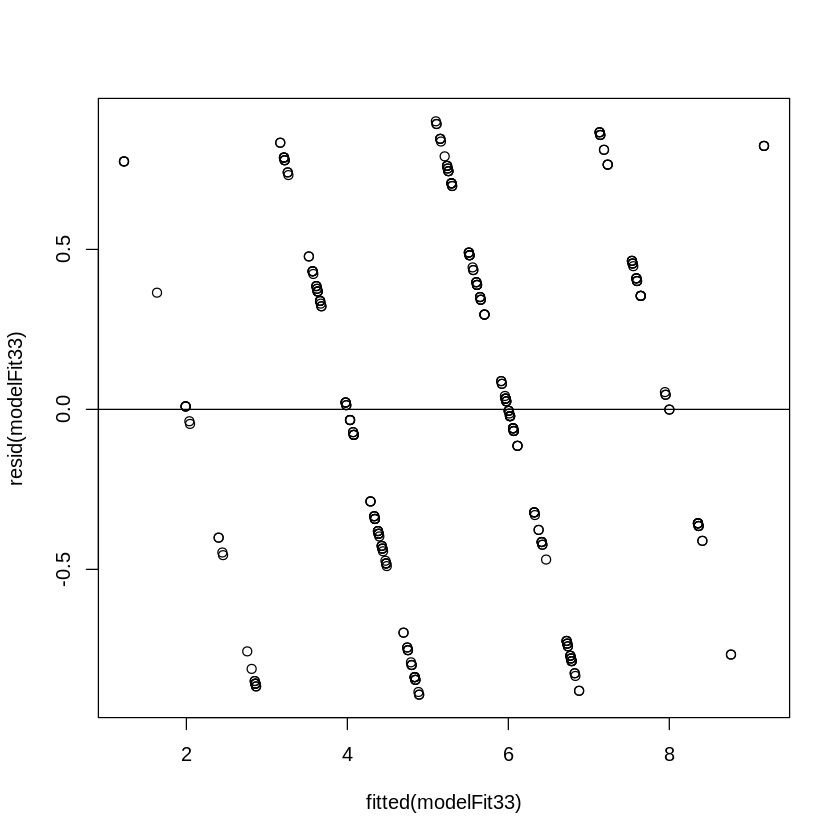

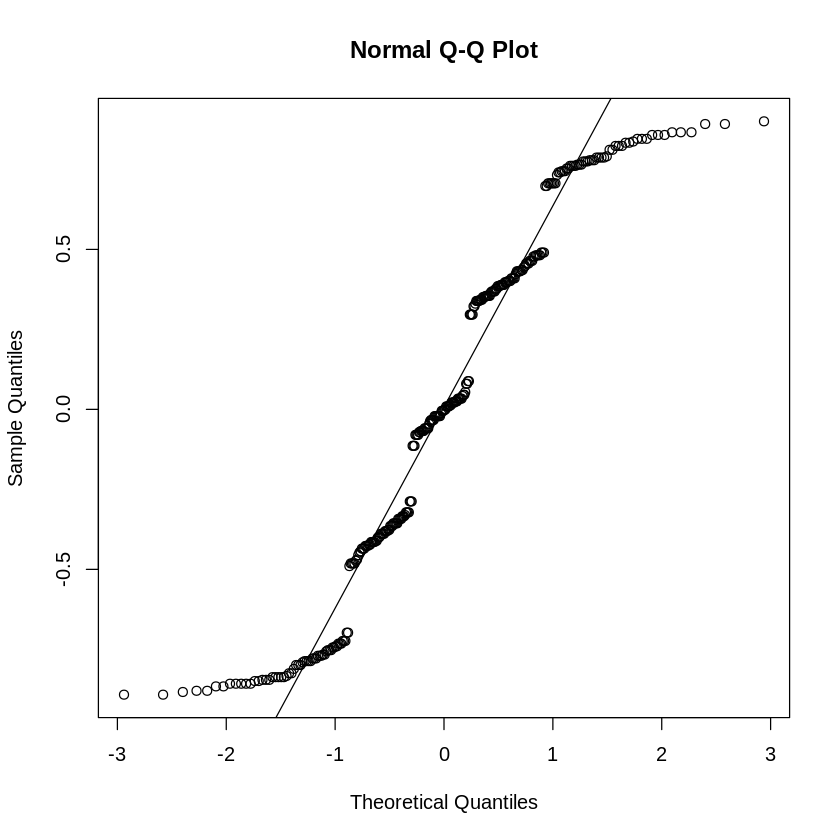

In [ ]:
plot(fitted(modelFit33), resid(modelFit33))
abline(h = 0)
qqnorm(resid(modelFit33))
qqline(resid(modelFit33))